# Recommandation

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import csv
import graphs
import armining
from pprint import pprint as cat

In [2]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 8)

In [3]:
def read_grades_from_csv(path):
    grades = {}
    missing_grades = []
    with open(path, 'r') as inFile:
        csv_reader = csv.reader(inFile)
        first_line = next(csv_reader)
        items = first_line[1:]
        for line in csv_reader:
            user = line[0]
            for i,grade in enumerate(line[1:]):
                if grade != '':
                    grades[(user, items[i])] = float(grade)
                else:
                    missing_grades.append((user, items[i]))
    return grades, missing_grades

## Scénario 1: *User-based Collaborative Filtering*

On suppose ici que l'on dispose d'un graphe social des utilisateurs. Ce graphe est stocké au format Edge List dans lefichier `data/mathInfoGraph.txt`.<br>
On souhaite utiliser ces informations sociales pour faire de la recommandationbasée utilisateurs

Chargez et visualisez ce graphe (non orienté) grâce au module `NetworkX`

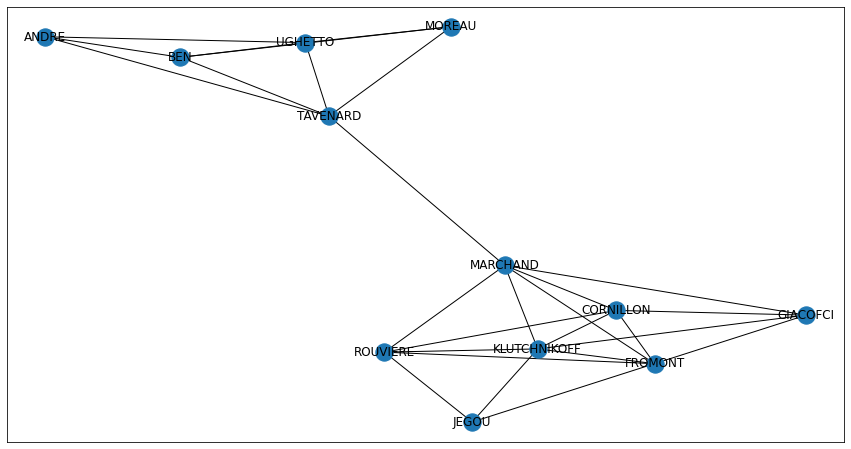

In [4]:
graph_1 = nx.readwrite.edgelist.read_edgelist("data/mathInfoGraph.txt", create_using=nx.Graph())
nx.draw_networkx(graph_1)

Chargez le fichier de notes `data/notes.csv` attribuées par les utilisateurs aux produits considérés enutilisant la fonction `read_grades_from_csv()`.

In [5]:
given, empty = read_grades_from_csv("data/notes.csv")

print("Given: (first 5)")
cat(list(given.items())[:5])
print("\nEmpty: (first 5)")
cat(empty[:5])

Given: (first 5)
[(('CORNILLON', 'Blanche Hermine'), 12.0),
 (('CORNILLON', 'Britt'), 13.0),
 (('CORNILLON', 'Philomenn'), 8.0),
 (('CORNILLON', 'Skumenn Pale'), 9.0),
 (('CORNILLON', 'Morgane'), 12.0)]

Empty: (first 5)
[('CORNILLON', 'Coreff'),
 ('CORNILLON', 'Dremmwel'),
 ('GIACOFCI', 'Philomenn'),
 ('KLUTCHNIKOFF', 'Blanche Hermine'),
 ('KLUTCHNIKOFF', 'Coreff')]


Pour une recommandation basée utilisateur, la fonction `collaborative_filtering()` du module `graphs`  doit permettre de renvoyer la note estimée d'un utilisateur pour un produit, à partir d'un dictionnaire de notes (paramètre `scores`), du tuple (utilisateur, produit) (paramètre `target`), du nombre d emeilleurs "voisins" pris en compte (paramètre `n_neighbors`, *facultatif*), d'une fonction de similarité (paramètre `similarity_fun`, *facultatif*) et d'un graphe éventuel (paramètre `graph`, *facultatif*).

Complétez cette fonction pour calculer le terme de contribution des autres utilisateurs à la note estimée (terme de somme dans la formule d'estimation vue en cours) à partir d'une liste de triplets (autre utilisateur, utilisateur cible, similarité) renvoyée par la fonction de similarité et contenue dans la variable triplets. Vous utiliserez la fonction `top_k_triplets()` pour récupérer la liste des `n_neighbors` meilleurs triplets.

In [6]:
print(f'Note estimée pour {empty[0]}: {graphs.collaborative_filtering(given, empty[0], graph=graph_1)}')

Note estimée pour ('CORNILLON', 'Coreff'): 10.841571262176183


Utilisez la fonction `user_based_collaborative_filtering()` du module `graphs` pour répondre à laquestion suivante : *quel(s) produit(s) recommanderiez-vous à quel utilisateur ? On recommandera un produit àun utilisateur si la note estimée correspondante est supérieure ou égale à 12*

In [7]:
user_based = lambda x:(x,graphs.user_based_collaborative_filtering(given, x, graph=graph_1))
for (u,i),n in filter(lambda x:x[1]>=12, map(user_based, empty)):
    print(f'{u:>12} -> {i:>15}: {n:.2f}')

    GIACOFCI ->       Philomenn: 13.97
KLUTCHNIKOFF -> Blanche Hermine: 13.57
KLUTCHNIKOFF ->          Coreff: 13.79
KLUTCHNIKOFF ->    Skumenn Pale: 13.80
    ROUVIERE ->          Coreff: 12.87
    MARCHAND ->           Britt: 13.46
    MARCHAND ->    Skumenn Pale: 13.48
      MOREAU ->    Skumenn Pale: 12.50
       ANDRE -> Blanche Hermine: 12.87
       ANDRE ->           Britt: 12.82
     UGHETTO -> Blanche Hermine: 12.45
     UGHETTO ->           Britt: 12.39


## Scénario 2
Dans le module `graphs`, codez la fonction `cosine_sim` permettant de calculer la similarité cosinus pour deu xvecteurs de même dimension contenus dans des listes Python.

Codez également la fonction `common_grades` permettant d'obtenir et de renvoyer les vecteurs de notes communes de deux utilisateurs à partir du dictionnaire des notes de tous les utilisateurs. Cette fonction est utilisée dans la fonction `cosine_sim_all` qui permet de renvoyer la similarité cosinus pour toutes les pairs d'utilisateurs (sous forme d'une liste de triplets (autre utilisateur, utilisateur cible,similarité) ).

Utilisez la fonction `user_based_collaborative_filtering()` (sans passer de graphe en paramètre) pour répondre à la question suivante : *quel(s) produit(s) recommanderiez-vous à quel utilisateur ?*

In [10]:
user_based = lambda x:(x,graphs.user_based_collaborative_filtering(given, x))
for (u,i),n in filter(lambda x:x[1]>=12, map(user_based, empty)):
    print(f'{u:>12} -> {i:>15}: {n:.2f}')

    GIACOFCI ->       Philomenn: 13.65
KLUTCHNIKOFF -> Blanche Hermine: 13.73
KLUTCHNIKOFF ->          Coreff: 14.39
KLUTCHNIKOFF ->    Skumenn Pale: 13.77
    ROUVIERE ->          Coreff: 13.59
    MARCHAND ->           Britt: 13.51
    MARCHAND ->    Skumenn Pale: 13.71
      MOREAU ->    Skumenn Pale: 12.44
         BEN ->         Morgane: 12.44
       ANDRE -> Blanche Hermine: 12.81
       ANDRE ->           Britt: 13.45
     UGHETTO -> Blanche Hermine: 12.41
     UGHETTO ->           Britt: 13.04


>Dans ce scénario, on recommandera 'Morgane' à BEN. Cela peut s'expliquer par les données prises en comptes pour l'estimation de la note.  
Dans le premier scénario, on prenait en compte les $n$ voisins, alors que dans ce second scénario l'ensemble des similarité cosinus est utilisé.

## Scénario 3: *Item-based Collaborative Filtering*
On suppose toujours que l'on ne dispose pas du graphe social des utilisateurs, seulement du fichier des notes, mais on souhaite maintenant faire de la recommandation basée produit.  
La mesure de similarité entre deux produits sera là aussi la similarité cosinus entre les vecteurs de notes communes aux deux produits.

Codez la fonction `item_based_collaborative_filtering` du module `graphs` pour qu'elle appelle la fonction `collaborative_filtering` en inversant les rôles des utilisateurs et des items dans le dictionnaire de notes (paramètre `scores` de `collaborative_filtering`) et le tuple (utilisateur, item) (paramètre `target` de `collaborative_filtering`)